# 2/10/20

Сегодня я понял, что делаю какую-то дичь, поэтому больше ничего переписывать я не буду, буду пользоваться всем, что у меня есть

Мне всё так же нужно переделать сечения

1. Получить список файлов для root кода

In [5]:
from glob import glob

for f in glob('/store17/petrov/data/kskl_sim_custom/tr_ph/*.root')[:3]:
    print(f)

/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.05.root
/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.075.root
/store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.125.root


- [x] Сделано
____
Теперь нужно прокрутить новое моделирование через мои root каты

In [18]:
%%bash
source /sl/root/root61600_cc7_64/bin/thisroot.sh
cd /spoolA/petrov/research/code
source KinScript.sh
root -l -b macro.cpp

Setup build environment for ROOT version 6.16.00 in /spoolA/petrov/research/code/KinFitter with BFARCH Linux310_x86_64_gcc485 !

Processing macro.cpp...
(int) 0
Working at file: /store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.05.root
Out path: ../outputs/model_new_v6/trees/525.00_0.root
Go loop
Is this model? Yes
Washing time: 0.55seconds.
Well done

Working at file: /store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.075.root
Out path: ../outputs/model_new_v6/trees/537.50_0.root
Go loop
Is this model? Yes
Washing time: 0.43seconds.
Well done

Working at file: /store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.125.root
Out path: ../outputs/model_new_v6/trees/562.50_0.root
Go loop
Is this model? Yes
Washing time: 0.41seconds.
Well done

Working at file: /store17/petrov/data/kskl_sim_custom/tr_ph/tr_ph_kskl_1.15.root
Out path: ../outputs/model_new_v6/trees/575.00_0.root
Go loop
Is this model? Yes
Washing time: 0.42seconds.
Well done

Working at file: /store17/petrov/data

Info in <TUnixSystem::ACLiC>: creating shared library /spoolA/petrov/research/code/./events_cpp.so


Как всегда всё идёт негладко, а именно файл с количеством мягких фотонов не хочет создаваться

- [x] Решено. Проблема была в том, что в новом моделировании импульсы в ГэВ
_____
Прокручу 11 год и старое моделирование v6

In [19]:
%%bash
source /sl/root/root61600_cc7_64/bin/thisroot.sh
cd /spoolA/petrov/research/code
source KinScript.sh
root -l -b macro.cpp

Process is terminated.


Посмотрю картинку с моделированием

In [98]:
%run code/plot_reg_eff_4.py
%matplotlib inline

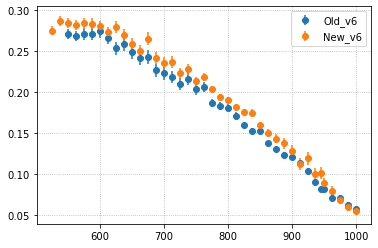

In [99]:
reg_eff("/spoolA/petrov/research/outputs/model_old_v6/trees", 
        "/spoolA/petrov/research/outputs/model_old_v6/soft_ph.csv", "Old_v6", True)
reg_eff("/spoolA/petrov/research/outputs/model_new_v6/trees", 
        "/spoolA/petrov/research/outputs/model_new_v6/soft_ph.csv", "New_v6", True)
plt.legend(frameon=True)
plt.grid(linestyle=':')

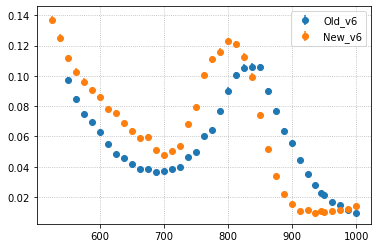

In [100]:
reg_eff("/spoolA/petrov/research/outputs/model_old_v6/trees", 
        "/spoolA/petrov/research/outputs/model_old_v6/soft_ph.csv", "Old_v6", False)
reg_eff("/spoolA/petrov/research/outputs/model_new_v6/trees", 
        "/spoolA/petrov/research/outputs/model_new_v6/soft_ph.csv", "New_v6", False)
plt.legend(frameon=True)
plt.grid(linestyle=':')

Теперь поработаю из `Analysis.ipynb`, получу число событий
- [x] сделано, обновлены файлы с событиями

Теперь можно построить более честные картинки с эффективностями, т.к. теперь числа определяются из фита

In [126]:
df = pd.read_csv('../../outputs/model_old_v6/tables/signal_tablemodel_old_v6.csv', index_col=['name'])
df['Nsig'] /= df.lum
df['dNsig'] /= df.lum
df2 = pd.read_csv('../../outputs/model_new_v6/tables/signal_tablemodel_new_v6.csv', index_col=['name'])
df2['Nsig'] /= df2.lum
df2['dNsig'] /= df2.lum

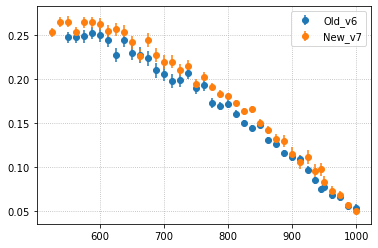

In [128]:
plt.errorbar(data=df, x='Emean', y='Nsig', yerr='dNsig', fmt='o', label='Old_v6')
plt.errorbar(data=df2, x='Emean', y='Nsig', yerr='dNsig', fmt='o', label='New_v7')
plt.grid(linestyle=':')
plt.legend(frameon=True);

Пересчитал сечения 2011 с учётом нового моделирования
![]('/spoolA/petrov/research/uproot/Journal/outputs/images/4NewEffCs.png')